**easygui -** imported to open a file box. It allows us to select any file from the system

**Imageio -** used to read the file which is chosen by file box using a path

**tkinter -** it is the standard GUI library for Python. Python when combined with tkinter provides a fast and easy way to create GUI applications. tkinter provides a powerful object-oriented interface to the tk GUI toolkit.

**PIL - Python Imaging Library** 

In [1]:
# pip install opencv-python
# !pip install easygui

## Importing Libraries

In [2]:
import cv2
import easygui
import numpy as np
import imageio
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

## Making the main window

In [3]:
top = tk.Tk()
top.geometry('400x400')
top.title('Cartoonify an Image !')
top.configure(background = 'black')
label = Label(top, background = 'black', font = ('calibri',20,'bold'))

## Building a File Box to choose a particular file

In [4]:
def upload():
    ImagePath = easygui.fileopenbox()
    cartoonify(ImagePath)

fileopenbox() is the method in easyGUI module which returns the path of the choosen file as a string

In [5]:
def cartoonify(ImagePath):
    # read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    #print(image)  # image is stored in form of numbers

    # confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()

    ReSized1 = cv2.resize(originalmage, (960, 540))
    #plt.imshow(ReSized1, cmap='gray')
    
    # Transforming an image to grayscale
    
    #converting an image to grayscale
    grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 540))
    #plt.imshow(ReSized2, cmap='gray')
    
    # Smoothening a grayscale image
    
    #applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
    #plt.imshow(ReSized3, cmap='gray')
    
    # Retrieving the edge of an image
    
    """retrieving the edges for cartoon effect by using thresholding technique"""
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

    ReSized4 = cv2.resize(getEdge, (960, 540))
    #plt.imshow(ReSized4, cmap='gray')

    # Preparing a mask image
    
    """applying bilateral filter to remove noise and keep edge sharp as required"""
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (960, 540))
    #plt.imshow(ReSized5, cmap='gray')

    # Giving a cartoon effect

    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

    ReSized6 = cv2.resize(cartoonImage, (960, 540))
    #plt.imshow(ReSized6, cmap='gray')

    # Plotting the whole transition
    
    images = [ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]

    fig, axes = plt.subplots(3,2, figsize =(8,8), 
                             subplot_kw = {'xticks':[], 'yticks':[]}, gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap ='gray')

    save1 = Button(top,text = "Save cartoon image",command = lambda: save(ReSized6, ImagePath),padx = 30,pady = 5)
    save1.configure(background = '#364156', foreground='blue',font = ('calibri',10,'bold'))
    save1.pack(side = TOP,pady = 50)
    
    plt.show()

**imread** is a methof in cv2 which is used to store images in the form of numbers. Which helps us perform various operations.

### Beginning with Image transformations

To convert an image to a cartoon, multiple transformations are done. Firstly, the image is converted to a **Grayscale** image. Next, the grayscale image is smoothened, after which the edges in the image are extracted. Finally, the color image will be formed and will mask it with edges.

### Transforming an image to grayscale

cvtColor(image, flag) is a method in cv2 which is used to transform an imahe into the color-space mentioned as 'flag'

Since the image is converted into grayscale, the flag **BGR2RGB** is used, which returns a greyscale image. 

### Smoothening a grayscale image

medianBlur() function is used to apply a blur effect to smoothen an image.

## Functionality of a save button

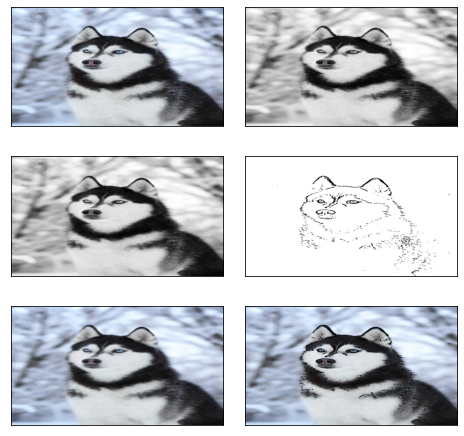

Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/msowmya/opt/anaconda3/lib/python3.8/tkinter/__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-5-9f33e70fc349>", line 62, in <lambda>
    save1 = Button(top,text = "Save cartoon image",command = lambda: save(ReSized6, ImagePath),padx = 30,pady = 5)
  File "<ipython-input-6-fcaee346e9eb>", line 9, in save
    tk.messagebox.showinfo(title = None, message = I)
AttributeError: module 'tkinter' has no attribute 'messagebox'


In [ ]:
def save(ReSized6, ImagePath):
    #saving an image using imwrite()
    newName = "cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension = os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName + extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I = "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title = None, message = I)

upload = Button(top,text = "Cartoonify an Image",command = upload,padx = 10,pady = 5)
upload.configure(background = '#364156', foreground = 'white',font = ('calibri',10,'bold'))
upload.pack(side = TOP,pady = 50)

top.mainloop()